#Unemployment Rate - Construction Industry, Private Wage and Salary Workers

Link to data: https://fred.stlouisfed.org/series/LNU04032231

In [1]:
install.packages("tsibble")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("tidyverse")
install.packages("scales")
install.packages("forecast")
install.packages("feasts")
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(tsibble)


Attaching package: ‘tsibble’


The following objects are masked from ‘package:base’:

    intersect, setdiff, union




In [5]:
library(tidyverse)
library(scales)
library(forecast)
library(feasts)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()       masks stats::filter()
✖ lubridate::interval() masks tsibble::interval()
✖ dplyr::lag()          masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: fabletools



In [6]:
unemployed <- read.csv('LNU04032231.csv')
unemployed %>% head()

,DATE,LNU04032231
,<chr>,<dbl>
1,2000-01-01,9.7
2,2000-02-01,10.6
3,2000-03-01,8.7
4,2000-04-01,5.8
5,2000-05-01,5.0
6,2000-06-01,4.6


In [9]:
suppressMessages(library(tidyverse))
suppressMessages(library(lubridate))


Unemployed <- read.csv('LNU04032231.csv')
Unemployed <- Unemployed %>%
  filter(LNU04032231 != '.') %>%
  mutate(DATE = as.Date(DATE), LNU04032231 = as.numeric(LNU04032231)) %>%
  mutate(MDT = floor_date(DATE, 'month')) %>%
  group_by(MDT) %>%
  arrange(desc(DATE)) %>%
  mutate(INDEX = row_number()) %>%
  ungroup() %>%
  filter(INDEX == 1, DATE < as.Date('2024-01-01')) %>%
  select(MDT,LNU04032231) %>%
  arrange(MDT)

UE <- ts(Unemployed$LNU04032231, start=c(2000,1), frequency = 12)

In [10]:
UE %>% head(108)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,9.7,10.6,8.7,5.8,5.0,4.6,4.4,5.1,4.6,4.9,5.7,6.8
2001,9.8,9.9,8.4,7.1,5.6,5.1,4.9,5.8,5.5,6.1,7.6,9.0
2002,13.6,12.2,11.8,10.1,7.4,6.9,6.9,7.4,7.0,7.7,8.5,10.9
2003,14.0,14.0,11.8,9.3,8.4,7.9,7.5,7.1,7.6,7.4,7.8,9.3
2004,11.3,11.6,11.3,9.5,7.4,7.0,6.4,6.0,6.8,6.9,7.4,9.5
2005,11.8,12.3,10.3,7.4,6.1,5.7,5.2,5.7,5.7,5.3,5.7,8.2
2006,9.0,8.6,8.5,6.9,6.6,5.6,6.1,5.9,5.6,4.5,6.0,6.9
2007,8.9,10.5,9.0,8.6,6.9,5.9,5.9,5.3,5.8,6.1,6.2,9.4
2008,11.0,11.4,12.0,11.1,8.6,8.2,8.0,8.2,9.9,10.8,12.7,15.3


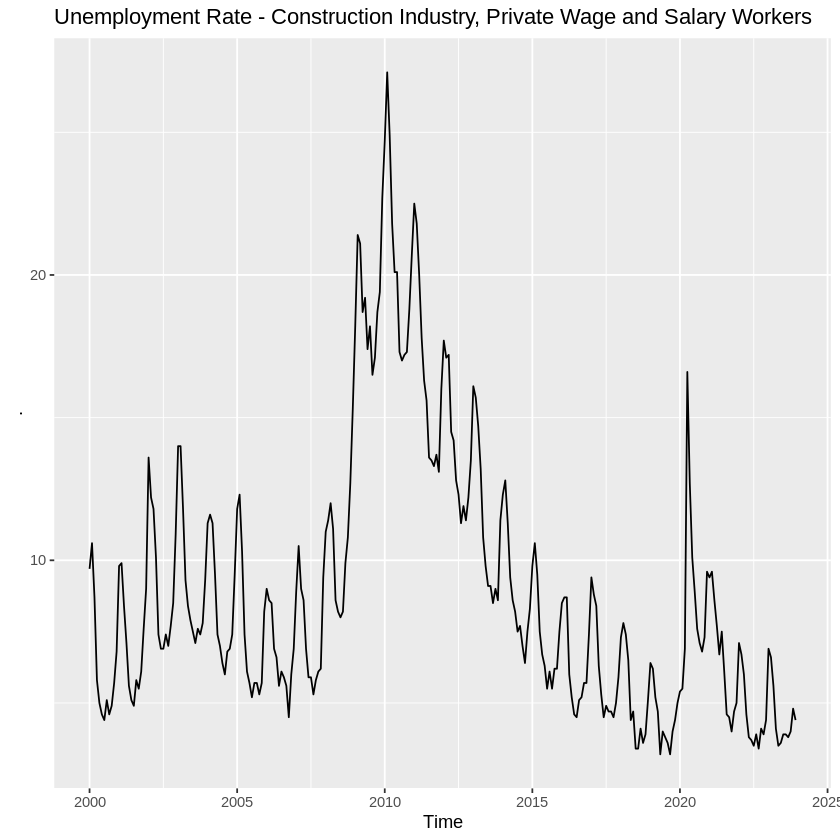

In [11]:
UE %>% autoplot() + ggtitle('Unemployment Rate - Construction Industry, Private Wage and Salary Workers')

The growth of this graph is linear and it is pretty informative, with its peak being in 2010, the unemployement rate was highest during this period. And then a similar tweak can be seen during the 2020 period.

This is expected because The Great Financial Crisis was hit from 2007 to 2009 and we could be seeing the after effects of it, where a lot of low level workers such as private wage and salary workers were unemployement. This period was very hard time on the contruction industry so that explains increase in umemployement rate.

The second peak is during 2020, where the country was in lockdown and all the workers were laid off.

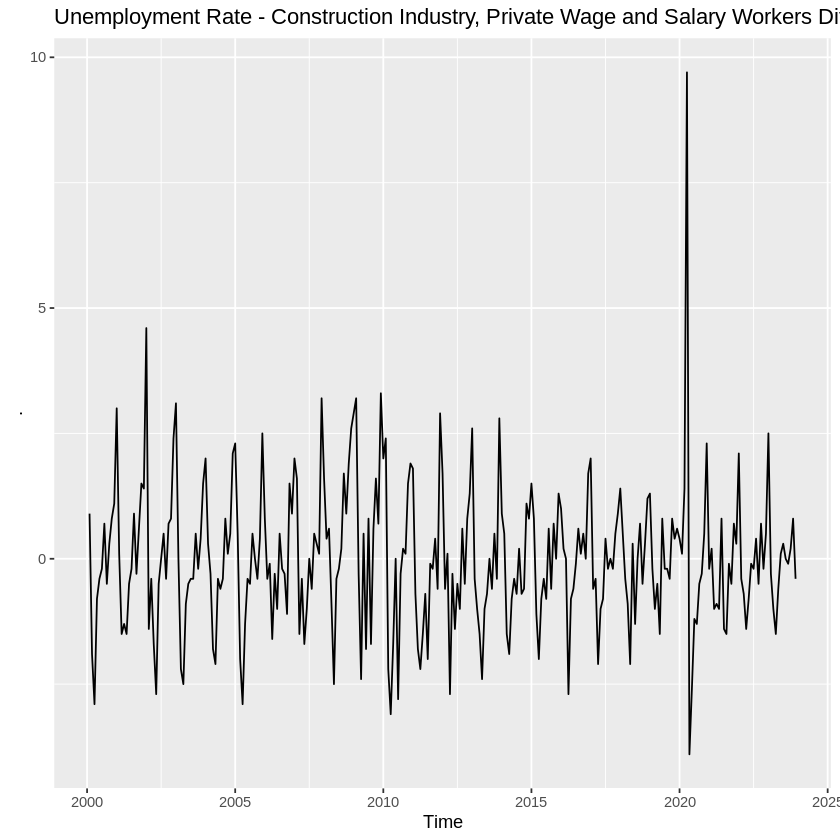

In [12]:
UE %>% diff() %>% autoplot() + ggtitle('Unemployment Rate - Construction Industry, Private Wage and Salary Workers Differenced graph')

The differenced graph shows the peak in 2020, but misses the increase and decrease during the 2010s.

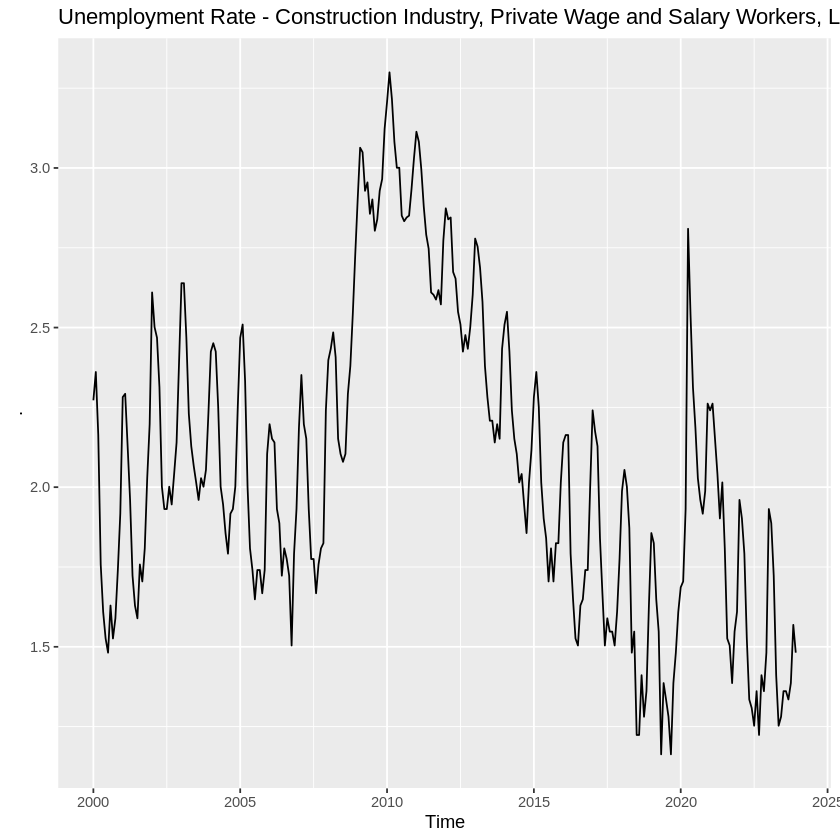

In [13]:
log_UE <- log(UE)
log_UE %>% autoplot() + ggtitle('Unemployment Rate - Construction Industry, Private Wage and Salary Workers, Log-transformed')

The log differenced graph is same as the whole time series plot.

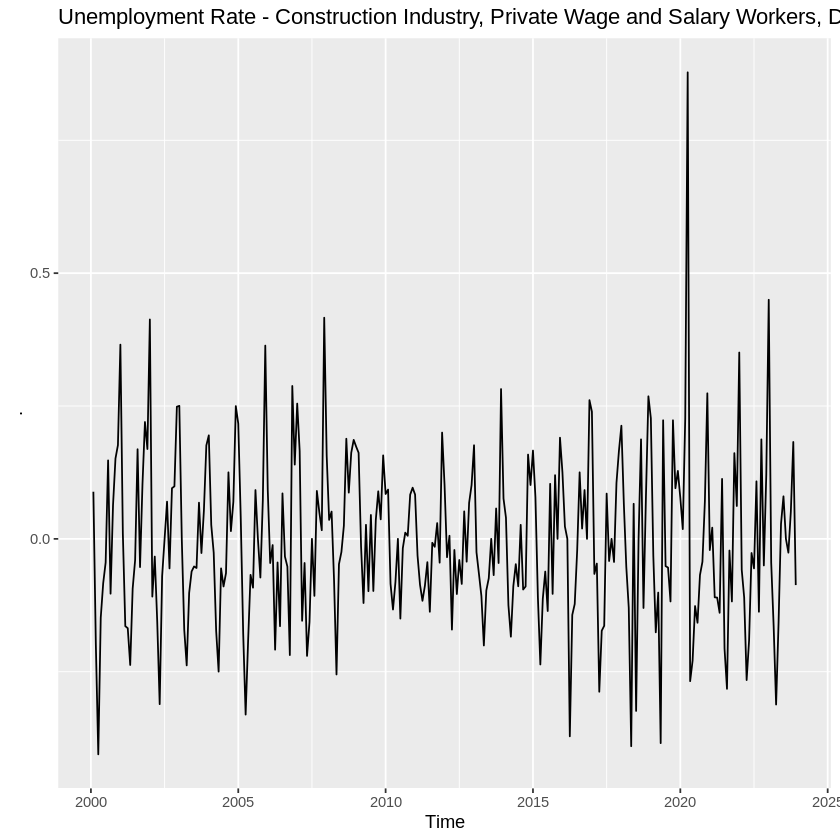

In [14]:
log_UE %>% diff() %>% autoplot() + labs(title='Unemployment Rate - Construction Industry, Private Wage and Salary Workers, Differenced Log-transformed')

#Trend Analysis

In [15]:
TrendModel <- tslm(log_UE ~ trend) %>% predict(log_UE) %>% ts(start=start(log_UE), frequency=frequency(log_UE))
TrendModel %>% head(96)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,2.344690,2.342815,2.340941,2.339067,2.337193,2.335319,2.333445,2.331570,2.329696,2.327822,2.325948,2.324074
2001,2.322200,2.320325,2.318451,2.316577,2.314703,2.312829,2.310955,2.309080,2.307206,2.305332,2.303458,2.301584
2002,2.299710,2.297835,2.295961,2.294087,2.292213,2.290339,2.288465,2.286590,2.284716,2.282842,2.280968,2.279094
2003,2.277220,2.275345,2.273471,2.271597,2.269723,2.267849,2.265975,2.264100,2.262226,2.260352,2.258478,2.256604
2004,2.254730,2.252855,2.250981,2.249107,2.247233,2.245359,2.243485,2.241610,2.239736,2.237862,2.235988,2.234114
2005,2.232240,2.230365,2.228491,2.226617,2.224743,2.222869,2.220995,2.219120,2.217246,2.215372,2.213498,2.211624
2006,2.209750,2.207875,2.206001,2.204127,2.202253,2.200379,2.198505,2.196630,2.194756,2.192882,2.191008,2.189134
2007,2.187260,2.185385,2.183511,2.181637,2.179763,2.177889,2.176015,2.174140,2.172266,2.170392,2.168518,2.166644


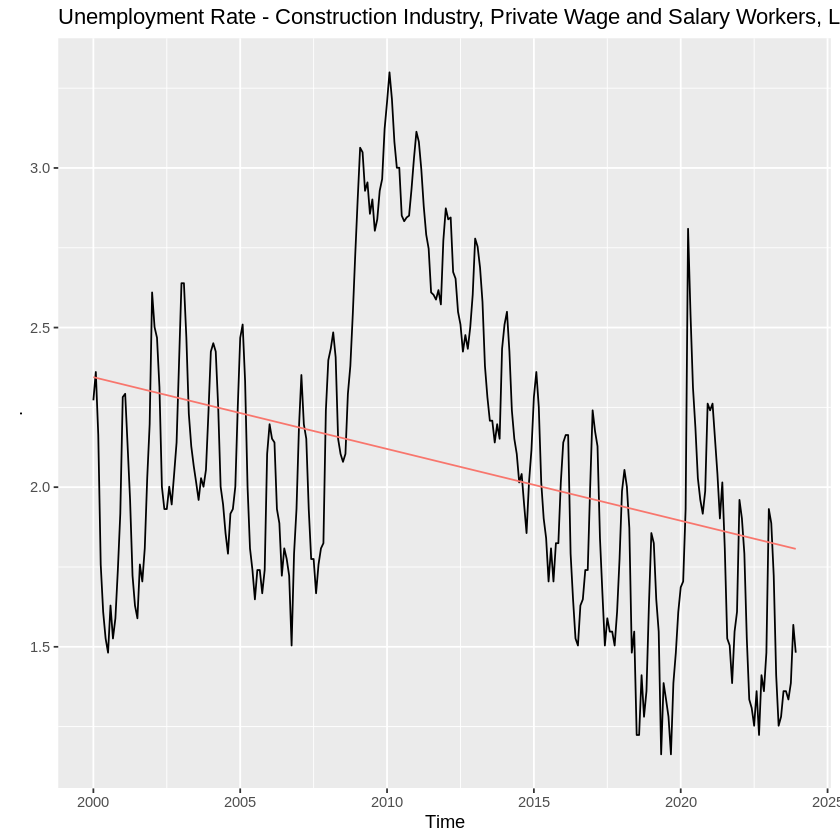

In [16]:
log_UE %>% autoplot() + autolayer(TrendModel, series='Linear Trend') + theme(legend.position="none") + ggtitle('Unemployment Rate - Construction Industry, Private Wage and Salary Workers, Log-transformed')

The whole trend shows decrease in the unemployement rate in construction industry, private wage and salary workers, which is a good thing. Though, there are increases during economic crisis, totally the trend of unemployement is decreasing.

#Cycles

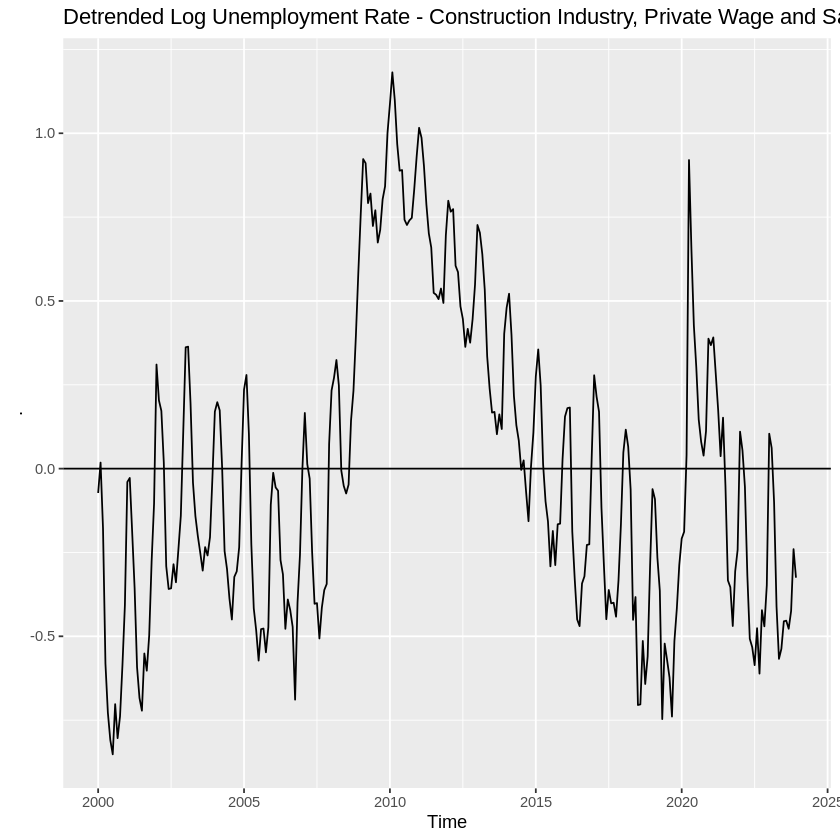

In [17]:
Detrend <- log_UE - TrendModel
detrendPlot <- Detrend %>% autoplot() + ggtitle('Detrended Log Unemployment Rate - Construction Industry, Private Wage and Salary Workers ') + geom_hline(yintercept=0)
detrendPlot

#Chart Annotations

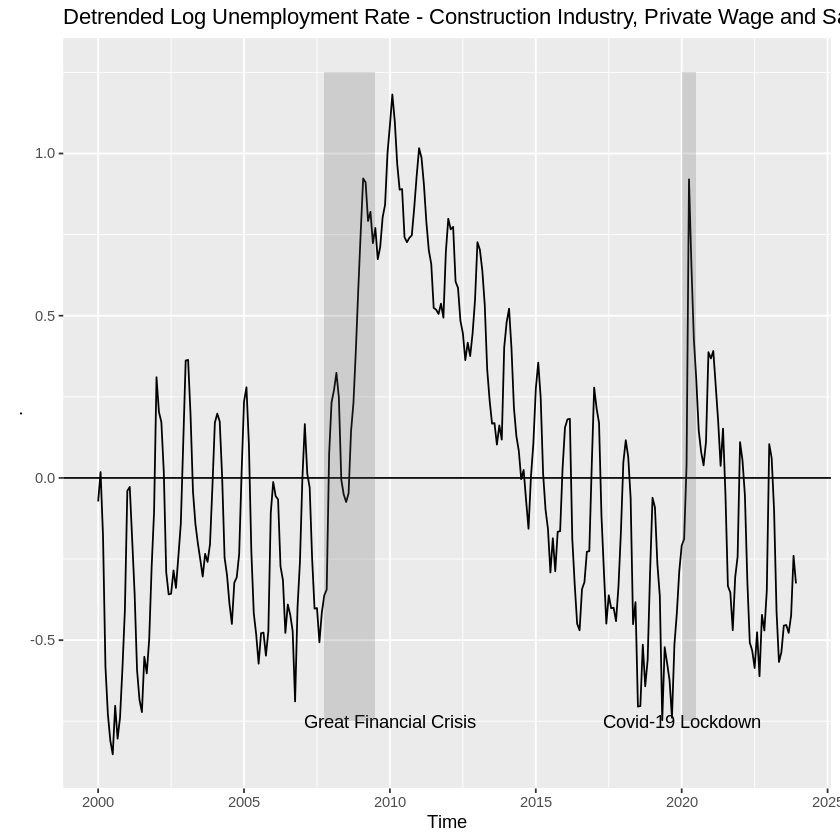

In [18]:
detrendPlot + annotate("text", x=2010, y=-0.75, label='Great Financial Crisis') + annotate("rect", xmin=2007.75, xmax=2009.5, ymin=-0.75, ymax=1.25, alpha=0.2) + annotate("text", x=2020, y=-0.75, label='Covid-19 Lockdown') + annotate("rect", xmin=2020, xmax=2020.5, ymin=-0.75, ymax=1.25, alpha=0.2)

# Seasonality

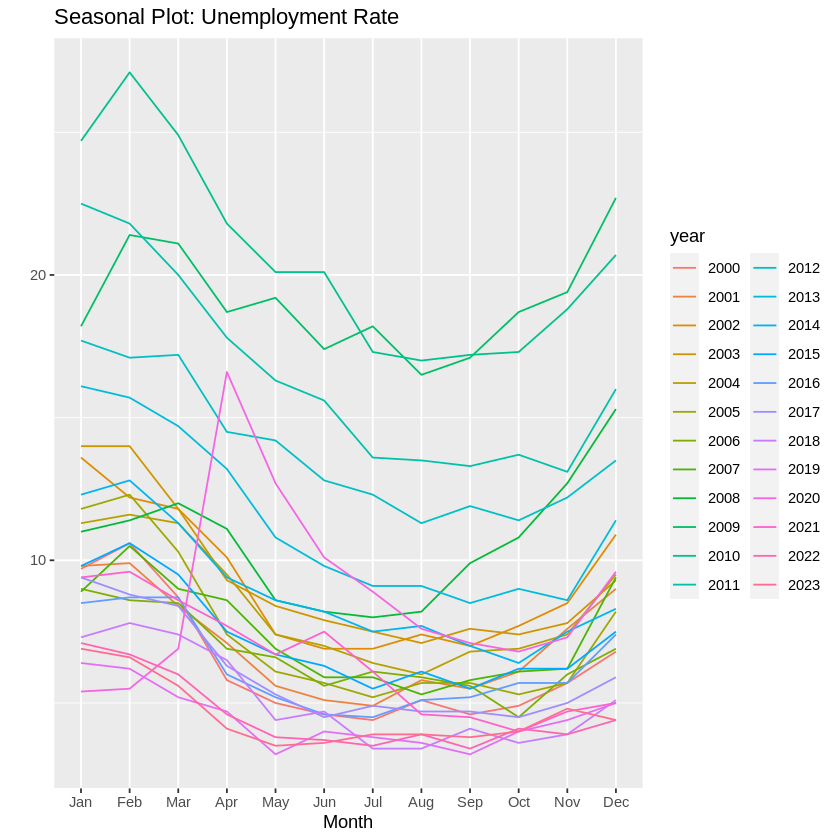

In [19]:
UE %>% ggseasonplot() + ggtitle('Seasonal Plot: Unemployment Rate')

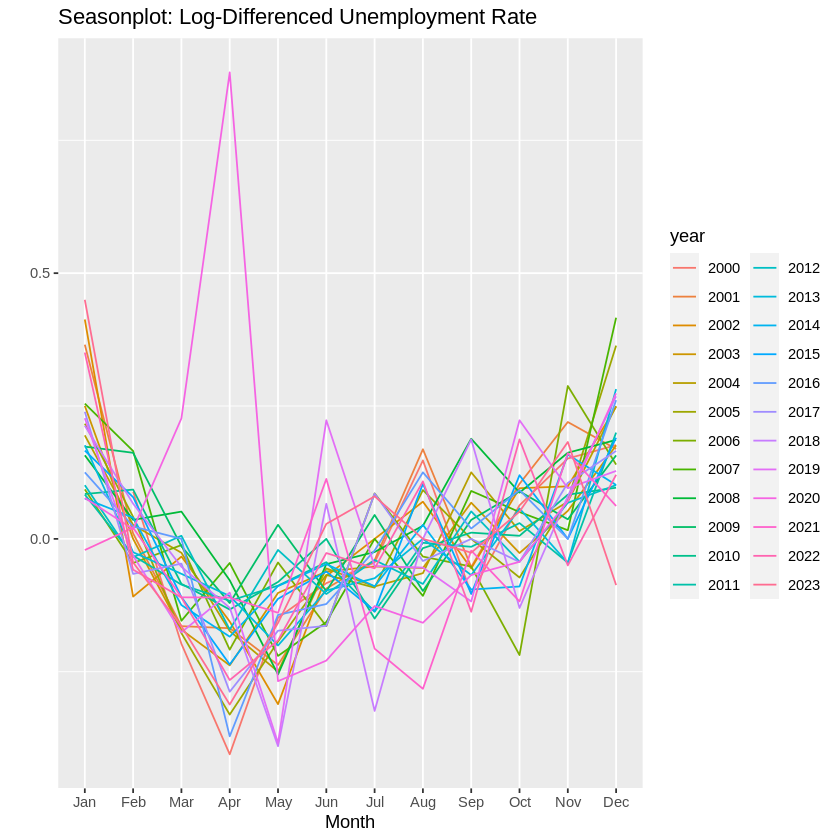

In [20]:
log_UE %>% diff() %>% ggseasonplot() + ggtitle('Seasonplot: Log-Differenced Unemployment Rate')

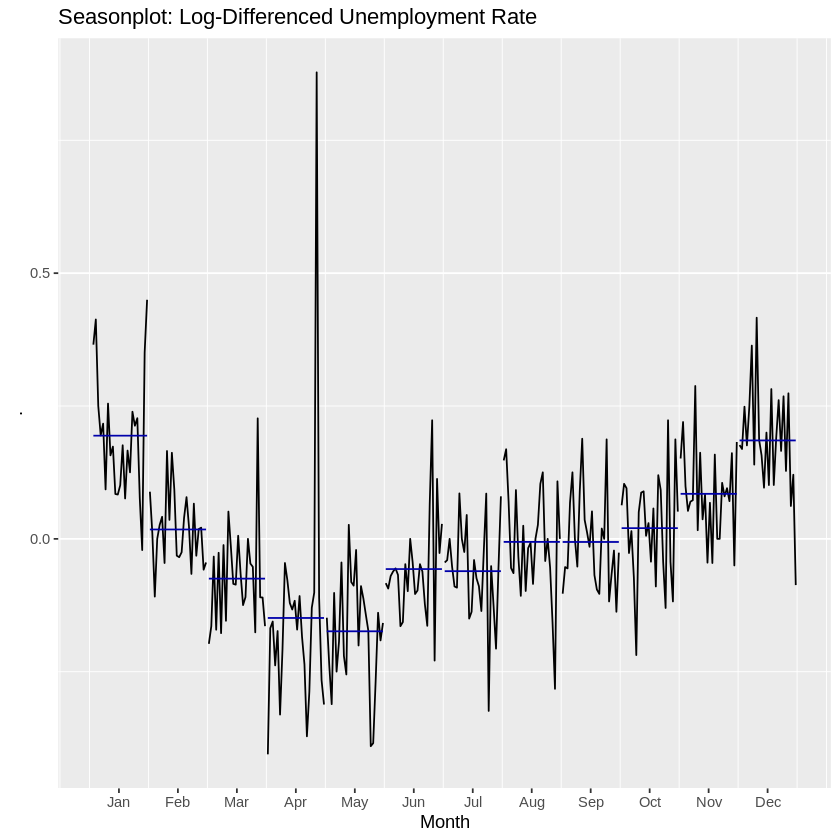

In [22]:
log_UE %>% diff() %>% ggsubseriesplot() + ggtitle('Seasonplot: Log-Differenced Unemployment Rate')

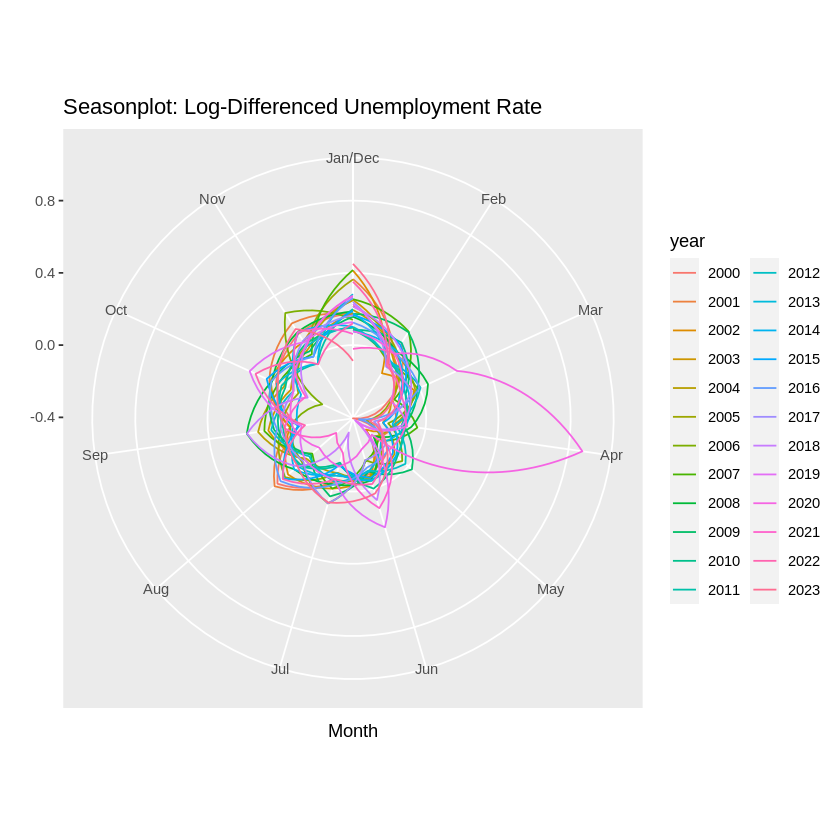

In [21]:
log_UE %>% diff() %>% ggseasonplot() + ggtitle('Seasonplot: Log-Differenced Unemployment Rate') + coord_polar()

Seeing as construction workers are mostly employed during the warmer months like during spring and summer, the unemployement rate among them low at that and high during the cold months of December and January.

#Lag Plots

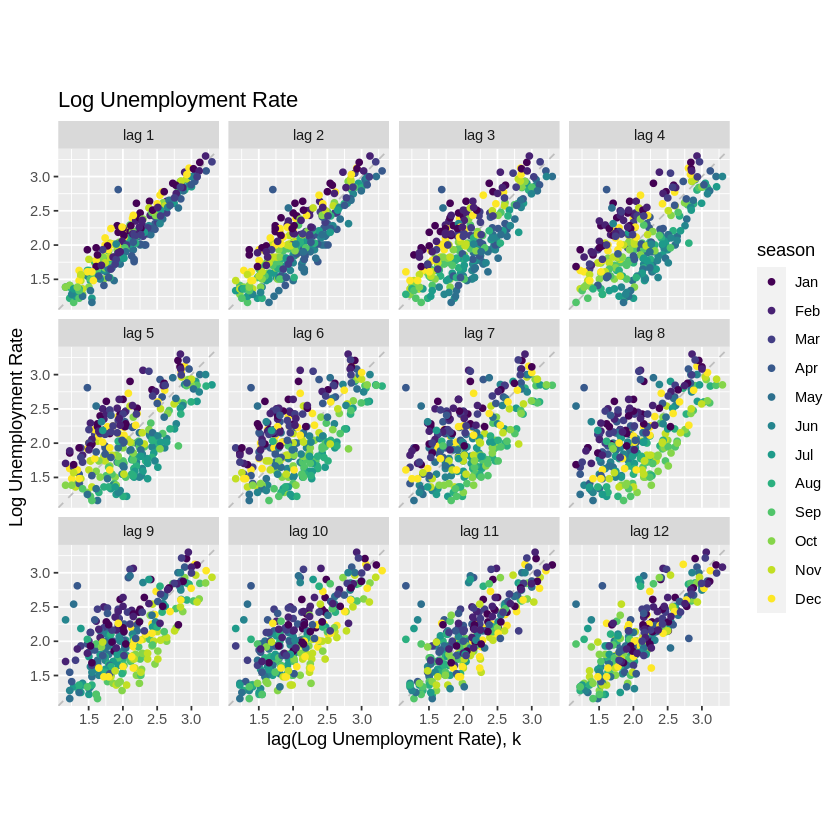

In [23]:
log_UE %>% as_tsibble() %>% gg_lag(value, geom='point', lags=1:12) + ggtitle('Log Unemployment Rate') + xlab('lag(Log Unemployment Rate), k') + ylab('Log Unemployment Rate')

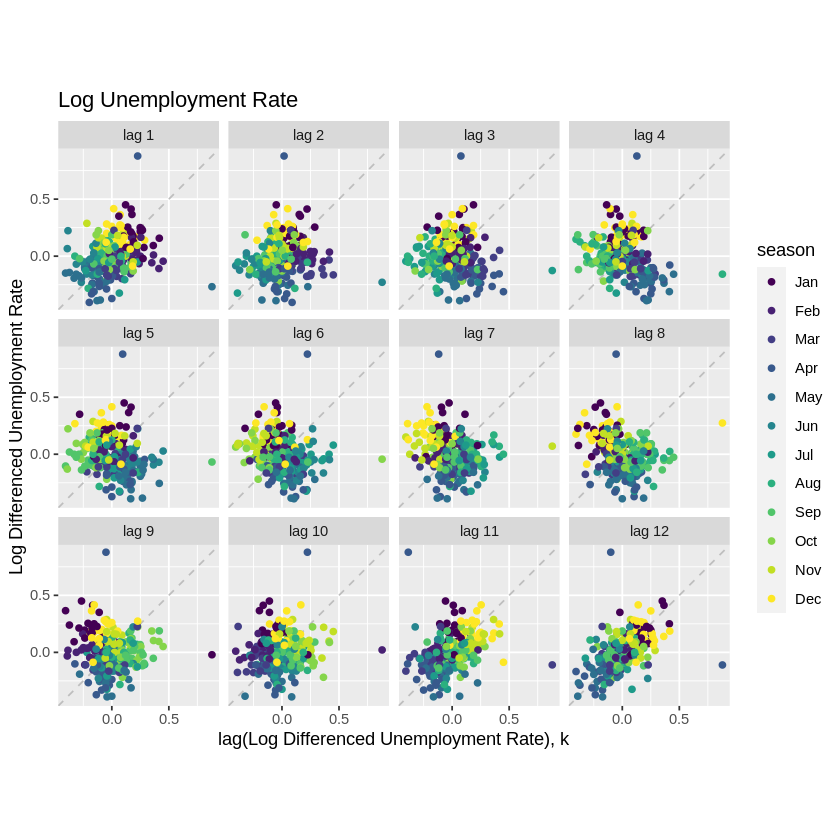

In [24]:
log_UE %>% diff() %>% as_tsibble() %>% gg_lag(value, geom='point', lags=1:12) + ggtitle('Log Unemployment Rate') + xlab('lag(Log Differenced Unemployment Rate), k') + ylab('Log Differenced Unemployment Rate')

#Autocorrelation

In [25]:
log_UE %>% as_tsibble() %>% ACF(value, lag_max=10)

lag,acf
<cf_lag>,<dbl>
1M,0.9445450
2M,0.8568919
3M,0.7553320
4M,0.6670273
5M,0.6096363
6M,0.5779502
7M,0.5726388
8M,0.5933520
9M,0.6426179


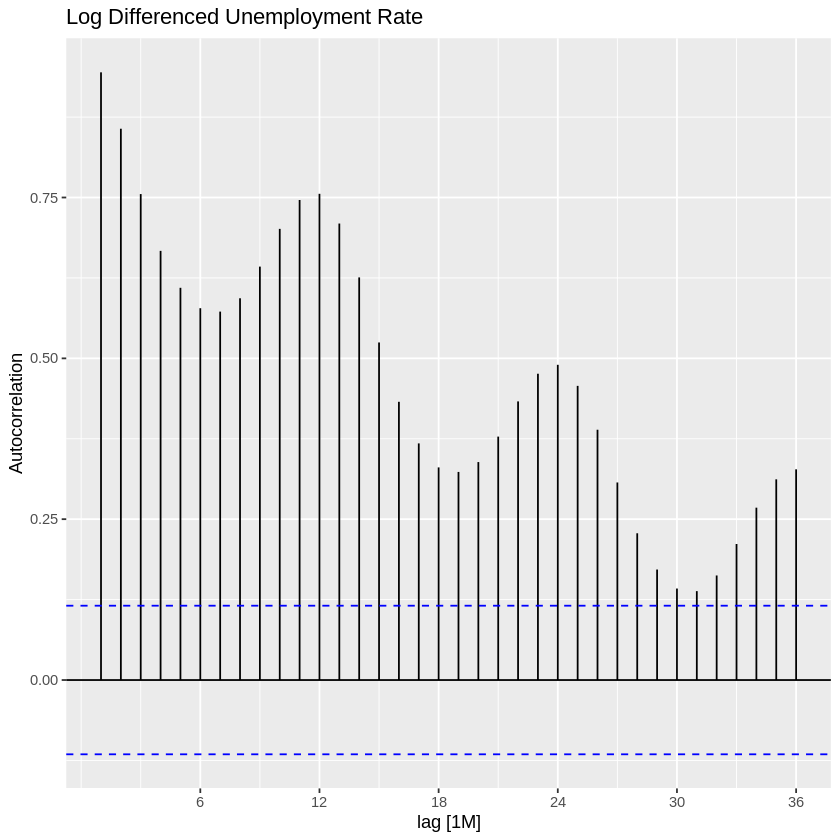

In [26]:
log_UE %>% as_tsibble() %>% ACF(value, lag_max=36) %>% autoplot() + labs(title='Log Differenced Unemployment Rate') + ylab('Autocorrelation')

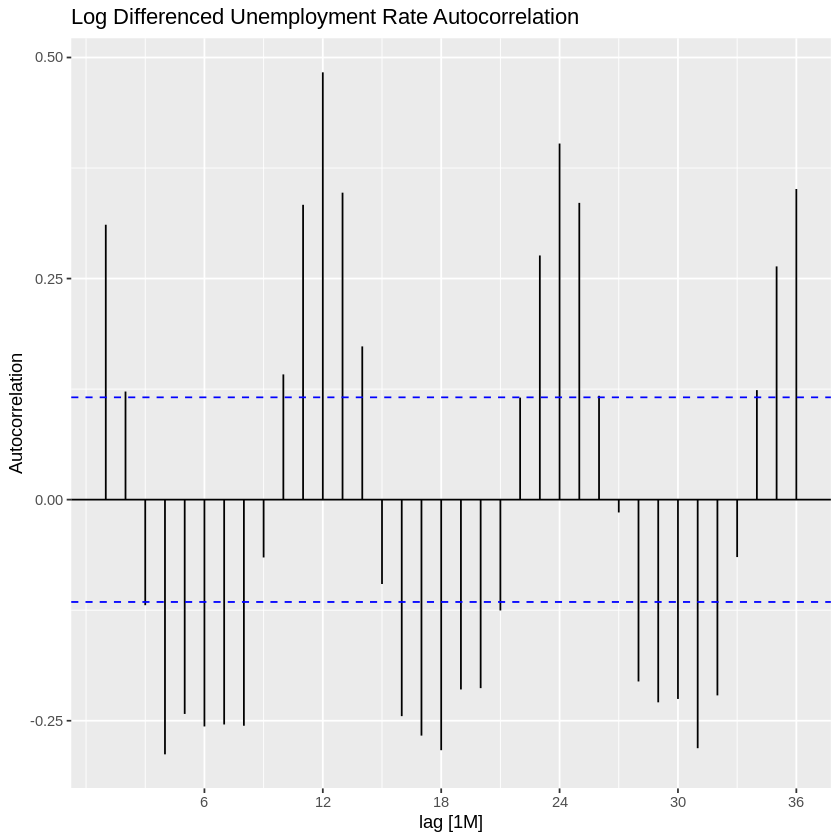

In [27]:
log_UE %>% diff() %>% as_tsibble() %>% ACF(value, lag_max=36) %>% autoplot() + labs(title='Log Differenced Unemployment Rate Autocorrelation') + ylab('Autocorrelation')

It shows positive autocorrelation at lags 12,24,36 due to the high rate of unemployement during the year end.

The negative autocorrelation peaks in the months of spring and summer (April to August), which is the time of minimum unemployement.

#Rolling Averages

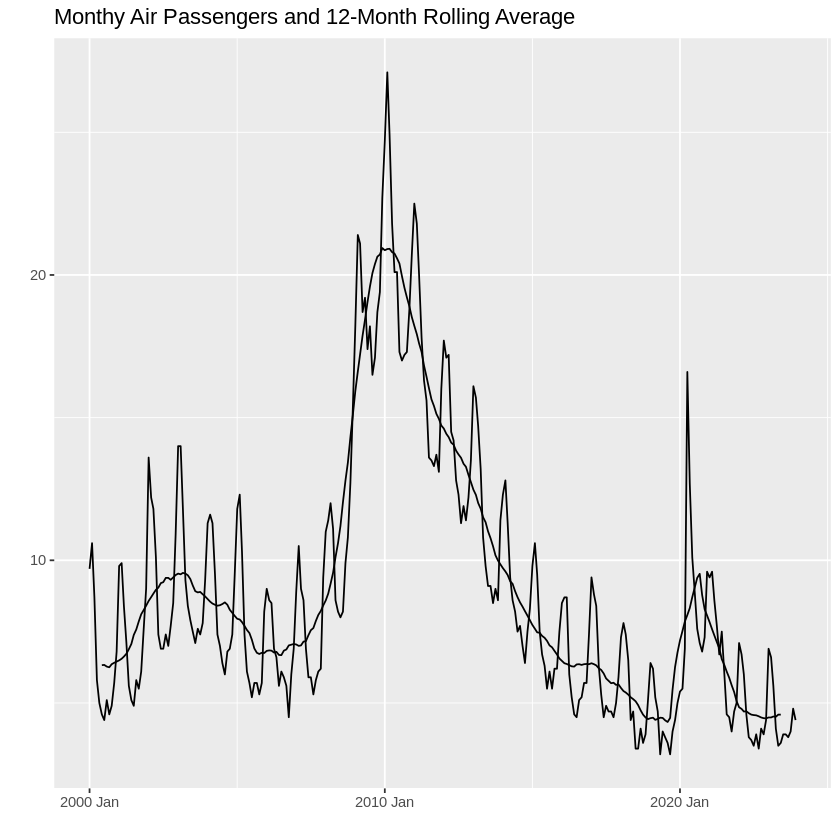

In [28]:
rollingUE <- zoo::rollmean(UE, 12) %>% as_tsibble()
UE %>% as_tsibble() %>% autoplot(value) + autolayer(rollingUE, value) + labs(title = 'Monthy Air Passengers and 12-Month Rolling Average', x='', y='')

#Summary

This data, Unemployment Rate – Construction Industry, Private Wages and Salary workers, which is taken from FRED. The data contains the unemployment percentage collected monthly from 2000 to 2024. This series comes from the 'Current Population Survey (Household Survey)'. The employees considered in this area from the construction sector, which includes Working supervisors, qualified craft workers, mechanics, apprentices, helpers, laborers, and so forth, engaged in new work, alterations, demolition, repair, maintenance, and the like, whether working at the site of construction or in shops or yards at jobs (such as precutting and preassembling) ordinarily performed by members of the construction trades.

#Trends
This time series exhibits a linear trend. In early there was a little rise in unemployment in 2003, but then the rate can be seen to come down. But, the noticeable peak happens during late 2007 and 2010. This was the period of the Great Financial Crisis, where the construction industry was very much affected and a lot of workers were laid off, which explains the increase in the unemployment rate. But, the actual peak occurs in the 2010 period, as the after-effects of the crisis.
From then on, the trend of unemployment kept coming down with the economic recovery. In 2020 we see another peak in unemployment during the COVID-19 lockdown, where everything in the country was shut down. The overall trend seems to be decreasing, which is a good sign as a decrease in unemployment means more economic growth for the country.

#Seasonality
We can see the seasonality in the graph according to the months. The rate is lower in the months of March, April, May, June, and July. Most constructions take place in warmer months spring and summer, which explains the employment of workers in that time. And, the rate is high during the months of December and January, as the colder months do not call for many constructions, which is the reason for more unemployment in this sector.
